In [35]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import opendatasets as od
from sklearn.model_selection import train_test_split

In [36]:
od.download('https://www.kaggle.com/competitions/titanic/')

Skipping, found downloaded files in ".\titanic" (use force=True to force download)


In [37]:
train_set = pd.read_csv('./titanic/train.csv')
test_set = pd.read_csv('./titanic/test.csv')

In [38]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
train_set.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [40]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
test_set.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [42]:
reqd_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
train_X = train_set[reqd_cols]
train_Lab = train_set.Survived

test_X = test_set[reqd_cols]

In [43]:
train_X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [44]:
train_X.isna().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
dtype: bool

In [45]:
for col in train_X.columns:
    print(col, ":", train_X[col].isna().sum())

Pclass : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Embarked : 2


In [46]:
#filling na values in age
mean_age = train_X['Age'].median()
train_X['Age'].fillna(value = mean_age, inplace = True)



mean_age_test = test_X['Age'].mean()
test_X['Age'].fillna(value = mean_age_test, inplace = True)

C:\Users\krish\AppData\Local\Temp\ipykernel_6544\2518913488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['Age'].fillna(value = mean_age, inplace = True)
C:\Users\krish\AppData\Local\Temp\ipykernel_6544\2518913488.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Age'].fillna(value = mean_age_test, inplace = True)


In [47]:
train_X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,28.0,1,2,S
889,1,male,26.0,0,0,C


In [48]:
encode = preprocessing.LabelEncoder()
train_X['Sex'] = encode.fit_transform(train_X['Sex'])
test_X['Sex'] = encode.transform(test_X['Sex'])

train_X.Embarked = encode.fit_transform(train_X.Embarked)
test_X.Embarked = encode.transform(test_X.Embarked)

C:\Users\krish\AppData\Local\Temp\ipykernel_6544\1107454423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['Sex'] = encode.fit_transform(train_X['Sex'])
C:\Users\krish\AppData\Local\Temp\ipykernel_6544\1107454423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['Sex'] = encode.transform(test_X['Sex'])
C:\Users\krish\AppData\Local\Temp\ipykernel_6544\1107454423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [49]:
train_X.shape

(891, 6)

In [50]:
train_X.isna().any()

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Embarked    False
dtype: bool

In [51]:
train_X.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Embarked      int32
dtype: object

In [52]:
train_X = train_X.astype('float32')

In [53]:
test_X = test_X.astype('float32')

In [54]:
train_Lab = train_Lab.astype('float32')

In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'elu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = "adam",
    loss = 'binary_crossentropy',
    metrics = 'accuracy')
history = model.fit(
    train_X,
    train_Lab,
    batch_size = 16,
    epochs = 100,
)
    

Epoch 1/100
56/56 [==============================] - 0s 3ms/step - loss: 0.6359 - accuracy: 0.6420
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7048
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.7486
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.5118 - accuracy: 0.7699
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7744
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.8013
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4731 - accuracy: 0.7834
Epoch 8/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4632 - accuracy: 0.7969
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4783 - accuracy: 0.7845
Epoch 10/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4561 - accuracy: 0.7946
Epoch 11/

In [56]:
def history_plotter(history):
    '''Plots training information over epochs
    Arguments: 1) history: history data obtained after training
    Returns: None
    '''
    epochs = len(history.epoch)
    epoch_range = range(epochs)
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']

    plt.figure(figsize = (16, 8))
    plt.plot(epoch_range, train_acc, label = 'Training Accuracy')
    plt.plot(epoch_range, train_loss, label = "Training Loss")
    plt.legend(loc = "lower right")
    plt.show()

In [57]:
y_s = model.predict(train_X)

28/28 [==============================] - 0s 829us/step


In [58]:
print(y_s)

[[0.09014735]
 [0.9817099 ]
 [0.64198995]
 [0.97110987]
 [0.08555543]
 [0.12494656]
 [0.28864866]
 [0.45868745]
 [0.5161905 ]
 [0.90702826]
 [0.7805476 ]
 [0.947002  ]
 [0.11792618]
 [0.01827188]
 [0.56028736]
 [0.83610034]
 [0.24125256]
 [0.21249433]
 [0.64634055]
 [0.77525645]
 [0.19104032]
 [0.19438466]
 [0.6979773 ]
 [0.41652986]
 [0.15883186]
 [0.26165465]
 [0.15187825]
 [0.28544295]
 [0.72208303]
 [0.09728274]
 [0.43492323]
 [0.98259085]
 [0.72208303]
 [0.08550332]
 [0.59596807]
 [0.4313007 ]
 [0.15187825]
 [0.11330581]
 [0.34703147]
 [0.72372186]
 [0.67863446]
 [0.8687948 ]
 [0.15187825]
 [0.96511614]
 [0.70781004]
 [0.09728274]
 [0.12806717]
 [0.72208303]
 [0.16221721]
 [0.4702359 ]
 [0.05840094]
 [0.11330581]
 [0.97799927]
 [0.87695706]
 [0.19546369]
 [0.41652986]
 [0.8498853 ]
 [0.14956541]
 [0.881113  ]
 [0.01041158]
 [0.18733034]
 [0.9536331 ]
 [0.42033446]
 [0.5129262 ]
 [0.51603913]
 [0.13861412]
 [0.8690396 ]
 [0.12397595]
 [0.11303473]
 [0.06975295]
 [0.20079316]
 [0.05

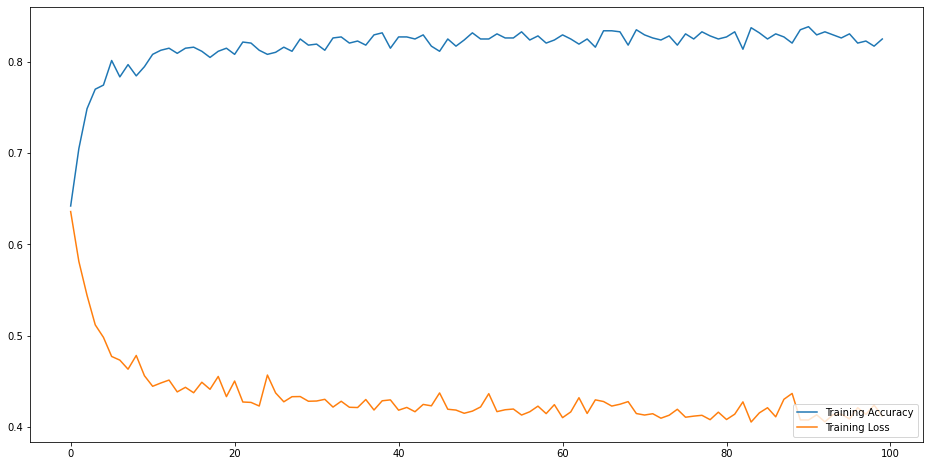

In [59]:
history_plotter(history)

In [60]:
preds = model.predict(test_X)

14/14 [==============================] - 0s 1ms/step


In [61]:
preds = np.where(preds > 0.5, 1, 0)

In [62]:
preds

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [63]:
preds = preds.astype('int')
preds = preds.flatten()


In [64]:
ans = pd.DataFrame(preds, test_set.PassengerId, columns = ['Survived'])

In [65]:
ans.to_csv('prediction.csv', sep = ',')